import matplotlib.pyplot as plt
import pandas as pd


In [94]:
df1=pd.read_csv('Laptop_Price.csv')
df1=df1.dropna()

*Univariant - histogram using matplotlib*

(array([ 29., 279., 197., 421., 204.,  82.,  27.,  11.,   8.,  27.]),
 array([0.69 , 1.091, 1.492, 1.893, 2.294, 2.695, 3.096, 3.497, 3.898,
        4.299, 4.7  ]),
 <BarContainer object of 10 artists>)

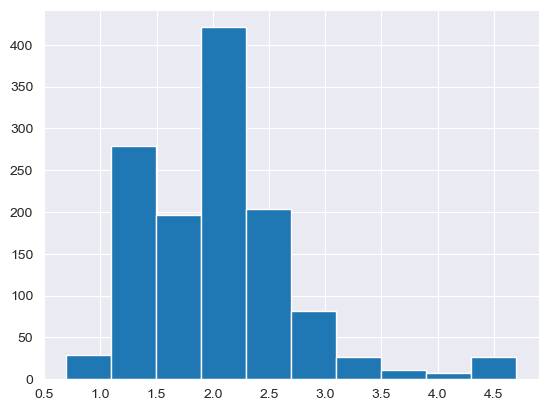

In [95]:
plt.hist(df1['Weight'],bins=10)

*figure,ylabel,xlabel,title*

Text(0.5, 1.0, 'diagram')

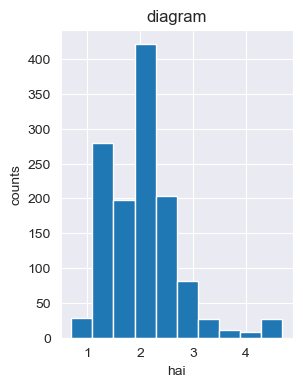

In [96]:
plt.figure(figsize=(3,4))
plt.hist(df1['Weight'],bins=10)

plt.xlabel('hai')
plt.ylabel('counts')
plt.title('diagram')

*Histogram using seaborn*

<Axes: xlabel='Weight', ylabel='Count'>

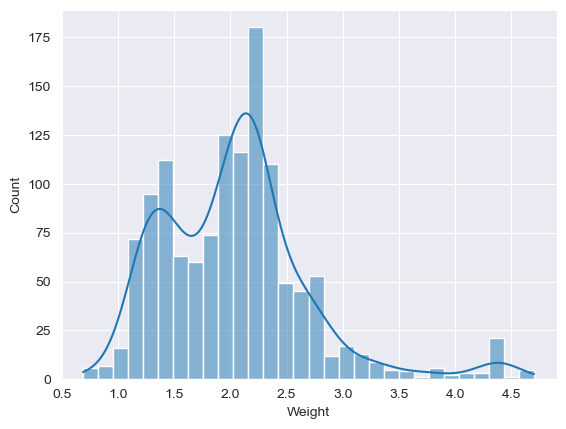

In [97]:
import seaborn as sns

sns.set_style('darkgrid')

sns.histplot(x=df1['Weight'],data=df1,bins=30,kde=True)

*legend , axvline*

mean: 2.041097276264592
Median: 2.04
Mode: 2.2


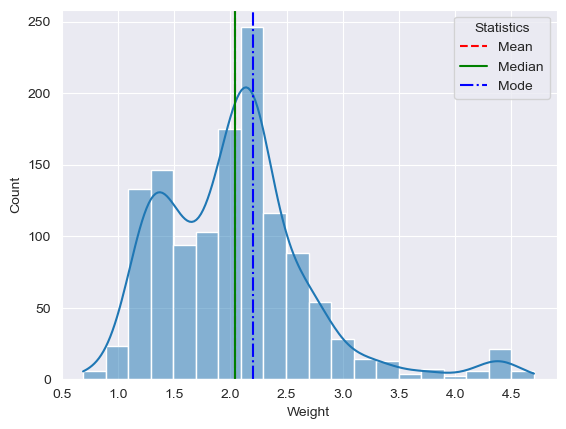

In [98]:
column=df1['Weight']

mean_value = column.mean()
median_value = column.median()
mode_value = column.mode()[0]  


sns.histplot(column, bins=20, kde=True,)

plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='green', linestyle='-', label=f'Median')
plt.axvline(mode_value, color='blue', linestyle='-.', label=f'Mode')
plt.legend(title='Statistics', loc='upper right', fontsize='medium')

print('mean:',mean_value)
print('Median:',median_value)
print('Mode:',mode_value)



*subplots ,tightlayout,savefig -dpi ,transparent*

- left skewed  - Mean  < Mode

- right skewed - Mode  < Mean

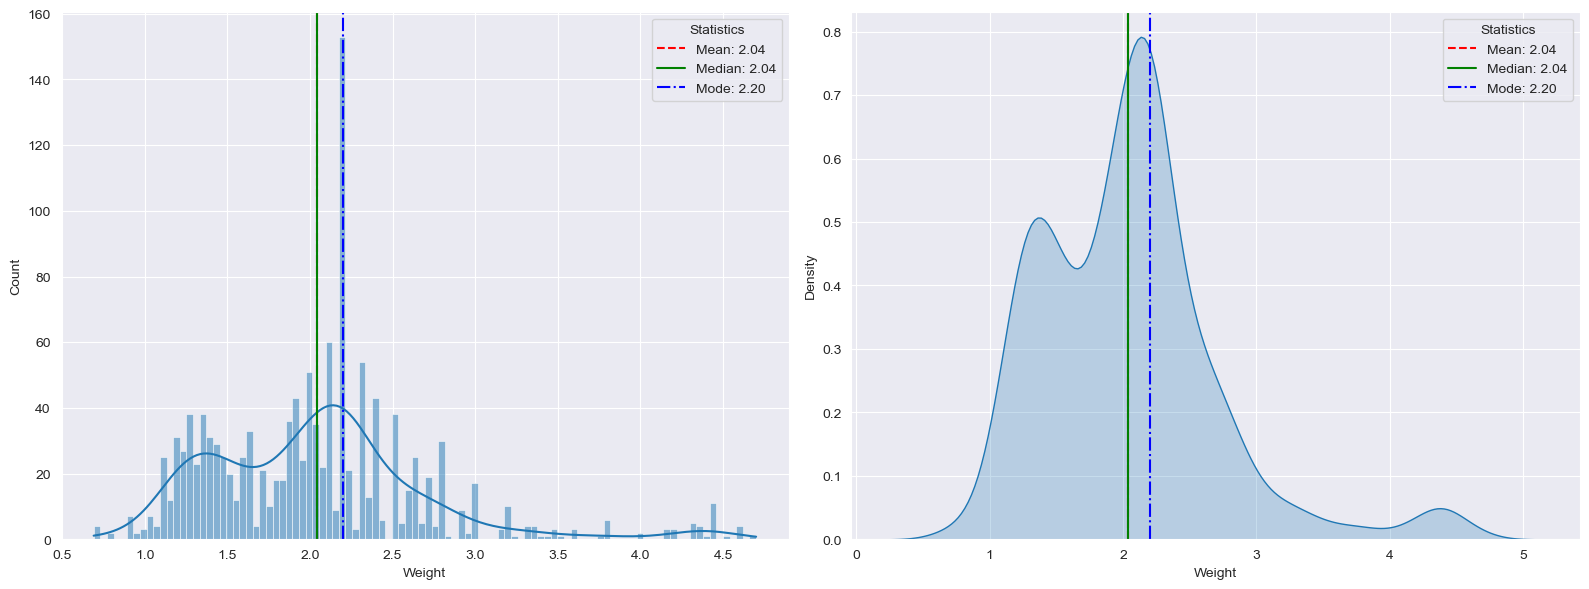

In [99]:
column=df1['Weight']

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

sns.histplot(column, bins=100, kde=True, ax=axes[0])

axes[0].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].axvline(mode_value, color='blue', linestyle='-.', label=f'Mode: {mode_value:.2f}')
axes[0].legend(title='Statistics', loc='upper right', fontsize='medium')


sns.kdeplot(column, fill=True, ax=axes[1])

axes[1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[1].axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
axes[1].axvline(mode_value, color='blue', linestyle='-.', label=f'Mode: {mode_value:.2f}')
axes[1].legend(title='Statistics', loc='upper right', fontsize='medium')

plt.tight_layout()

In [100]:
plt.savefig("hist_and_kde_plot.png",dpi=300,transparent=True)


<Figure size 640x480 with 0 Axes>

*pieplot and countplot*

- These plots are used only for categorical columns

/var/folders/gr/bkswjd_15kqc6h_w_4flf1t80000gn/T/ipykernel_55641/986521576.py:20: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=columns , ax=ax[1], palette=custom_palette,hue=columns);


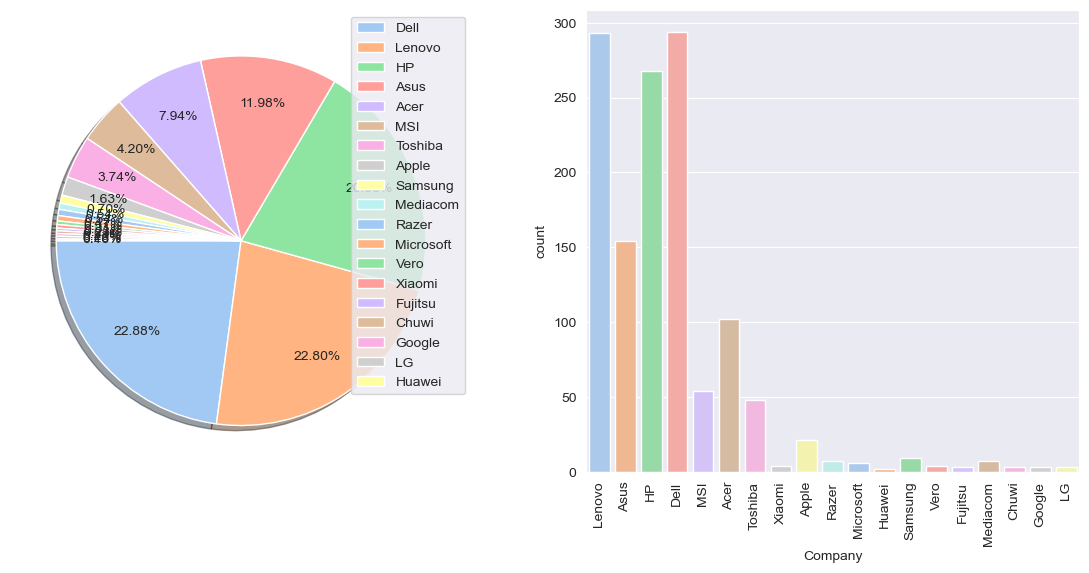

Company
Dell         294
Lenovo       293
HP           268
Asus         154
Acer         102
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Fujitsu        3
Chuwi          3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [101]:
columns=df1.Company

counts = df1.Company.value_counts()

custom_palette = sns.color_palette("pastel")

f, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].pie(
    x=counts.values,
    autopct='%.2f%%',# %-%% indicate it should be in precentage
    pctdistance=0.75,
    startangle=180,
    shadow=True,
    colors=custom_palette,

)
ax[0].legend(labels=counts.index)

sns.countplot(x=columns , ax=ax[1], palette=custom_palette,hue=columns);
plt.xticks(rotation=90)  # or try 45 for slanted

plt.show()
display(counts)


*boxplot*

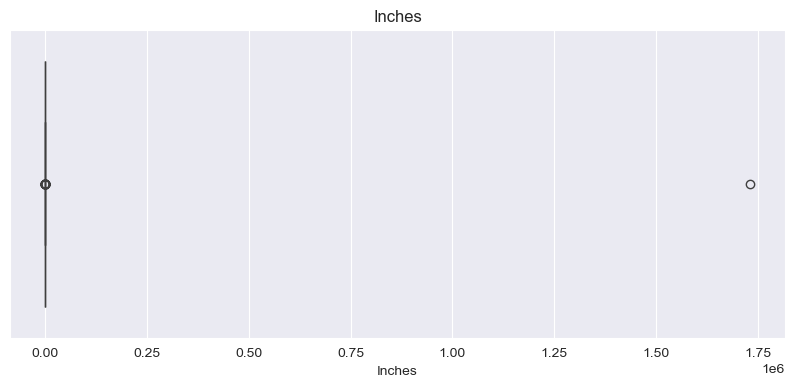

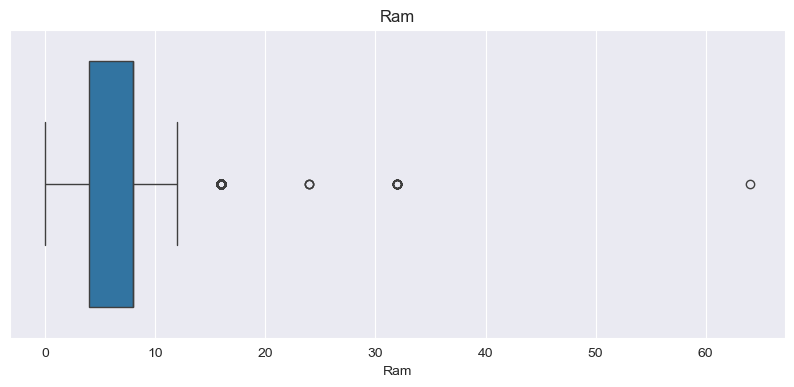

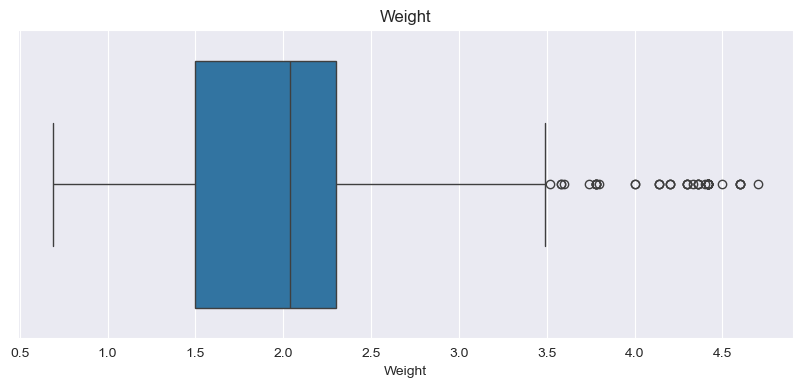

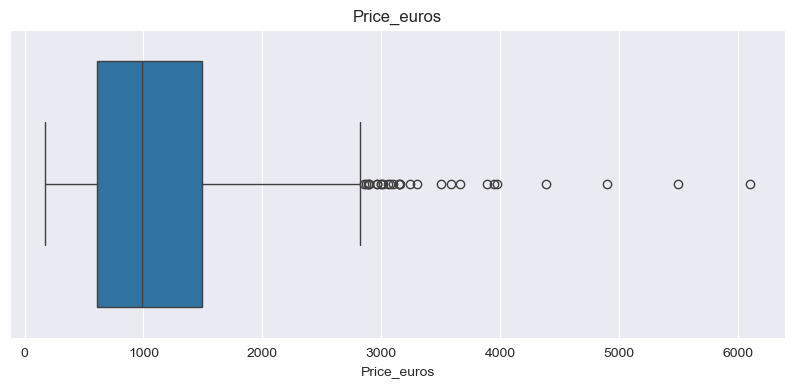

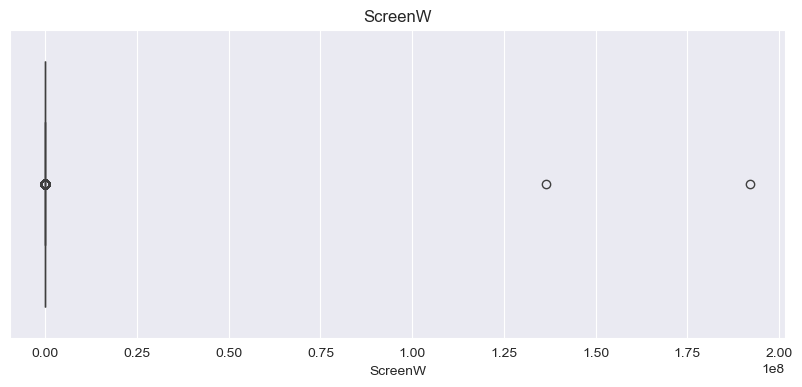

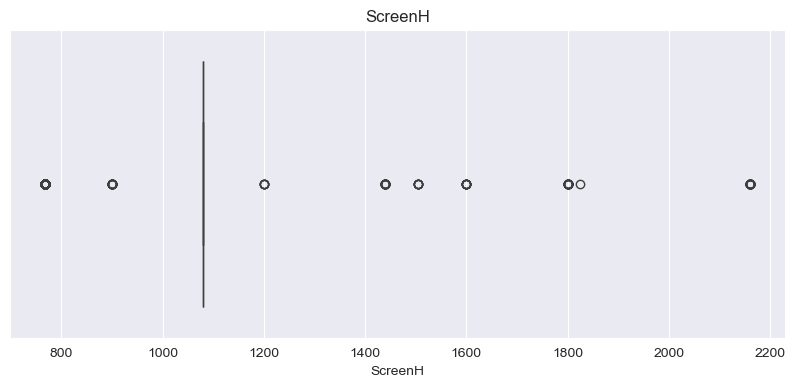

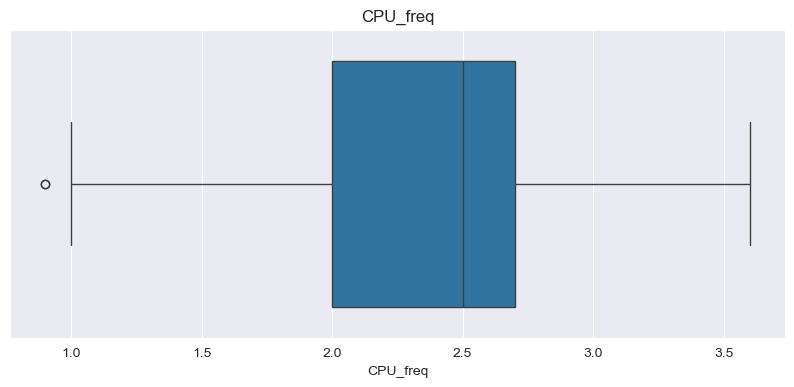

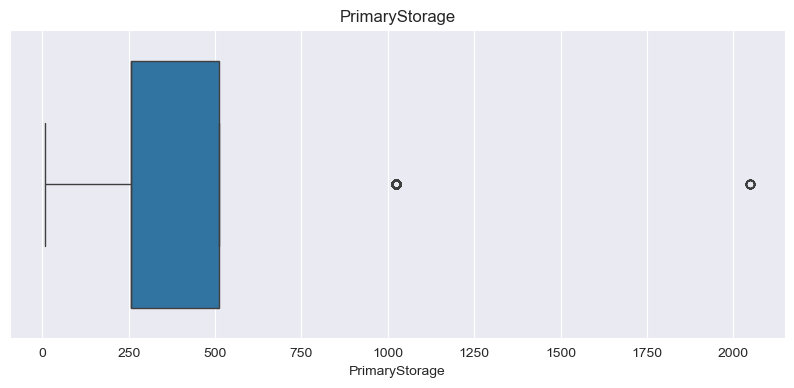

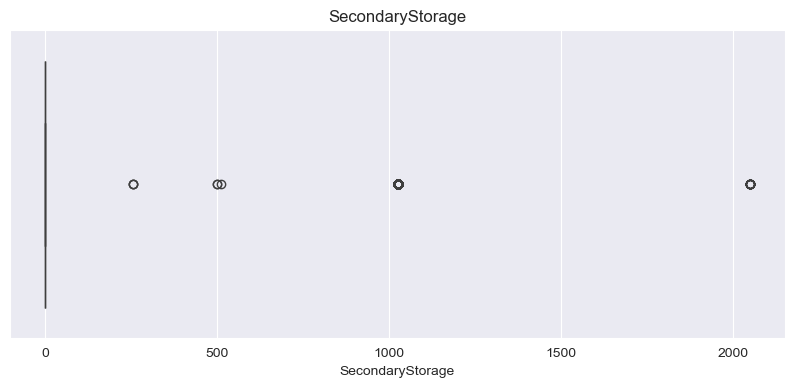

In [102]:
for col in df1.select_dtypes(exclude='object').columns:
    
        plt.figure(figsize=(10, 4)) 
        sns.boxplot(x=df1[col]) 
        plt.title(col)
        
        plt.show()


*outlier detection*

In [103]:
print(df1.ScreenW.min())
print(df1.ScreenW.max())

8.196e-05
192000000.0


In [104]:
df1[(df1['ScreenW'] < 2) | (df1['ScreenW'] > 3840)]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
200,Asus,Rog Strix,Gaming,15.6,16.0,Windows 10,2.20,2449.0,Full HD,1.152000e-04,...,No,Intel,2.8,Core i7 7700HQ,256.0,1024,SSD,HDD,Nvidia,GeForce GTX 1070
849,Dell,Inspiron 5579,2 in 1 Convertible,15.6,8.0,Windows 10,2.08,819.0,Full HD,1.920000e+08,...,No,Intel,1.8,Core i7 8550U,1024.0,0,HDD,No,Intel,UHD Graphics 620
932,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2.0,Windows 10,1.50,229.0,Standard,1.366000e+08,...,No,Intel,1.6,Celeron Dual Core N3050,64.0,0,Flash Storage,No,Intel,HD Graphics
1249,Acer,TravelMate P238-M,Notebook,13.3,4.0,Windows 10,1.60,655.0,Standard,8.196000e-05,...,No,Intel,2.3,Core i5 6200U,128.0,0,SSD,No,Intel,HD Graphics 520


In [105]:
df1=df1[(df1['ScreenW'] > 2) & (df1['ScreenW'] < 3840)]

*label encoder*

In [106]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
df1['Company']=le.fit_transform(df1['Company'])
df1['Company']

names=df1.columns[df1.dtypes=='object']

for col in names:
    df1[col]=le.fit_transform(df1[col].astype('str'))



*heatmap with corr*

<Axes: >

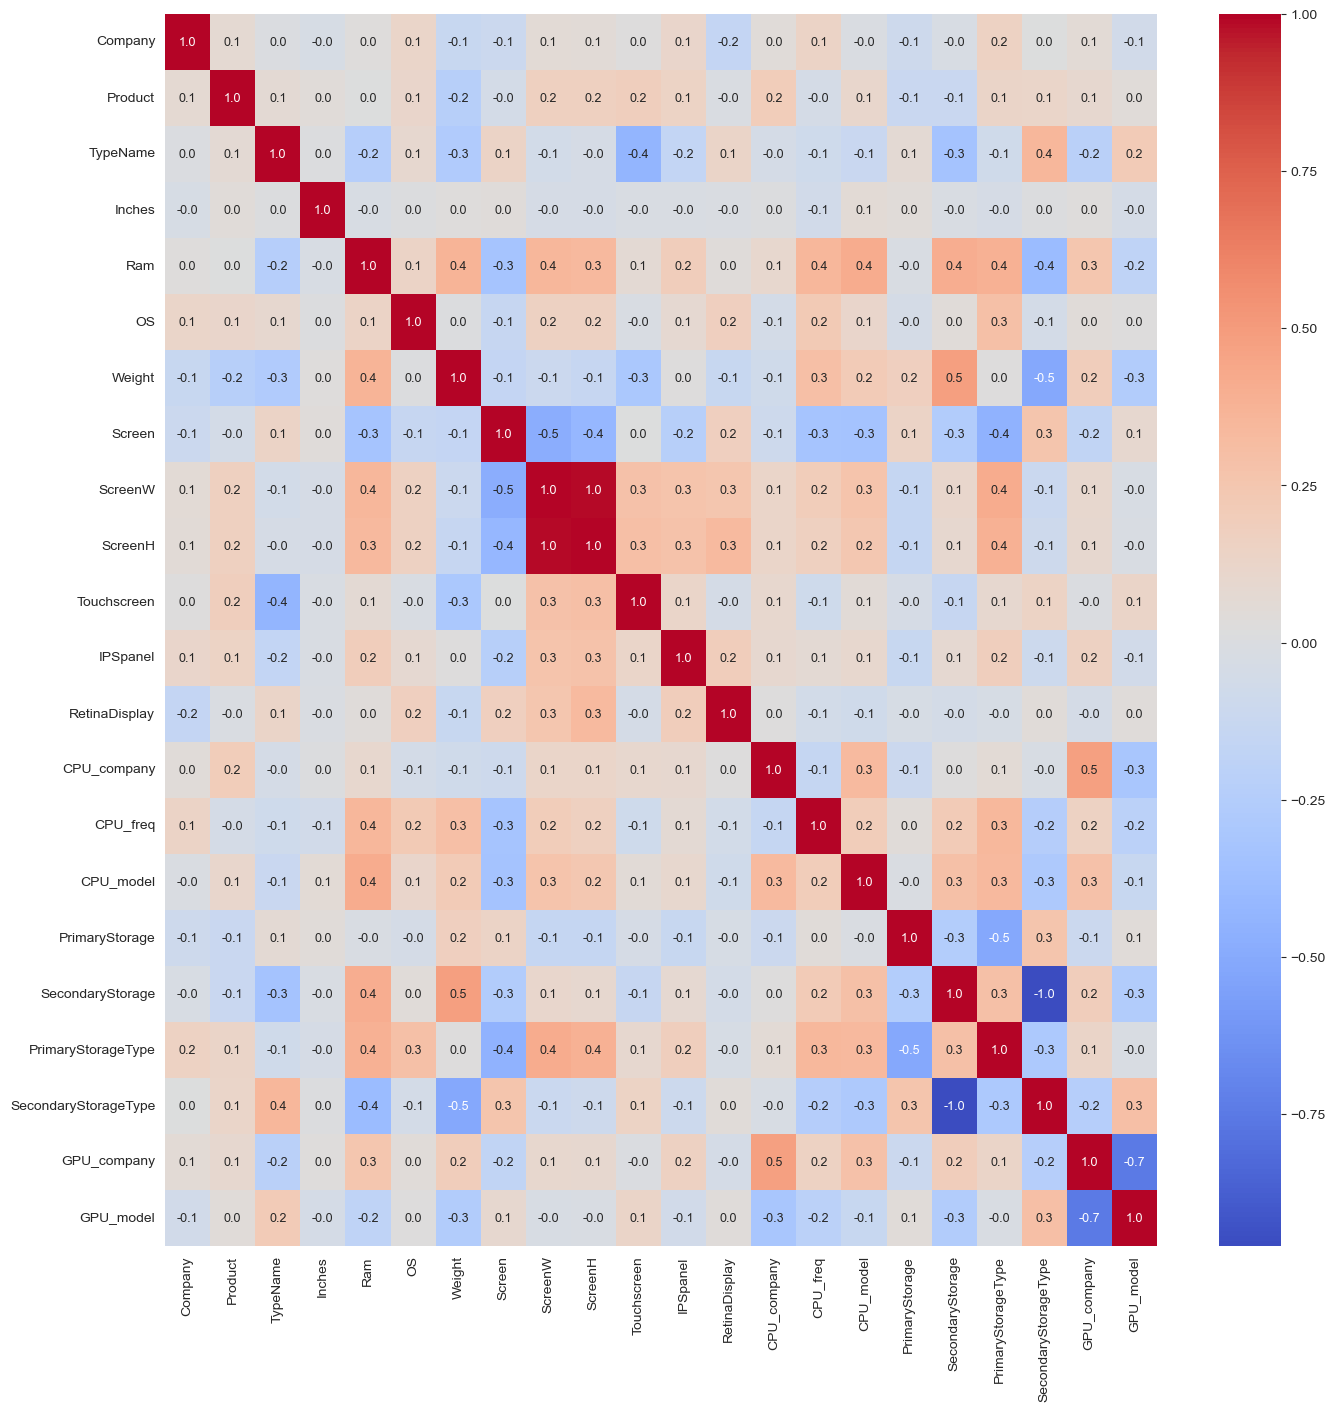

In [107]:
plt.figure(figsize=(16, 16)) 
df2=df1.drop('Price_euros',axis=1)
sns.heatmap(df2.corr(),annot=True,fmt=".1f",annot_kws={"size": 9},cmap='coolwarm')

#"coolwarm""magma""YlGnBu""RdYlGn""Blu

*heatmap with one feature of corr*

<Axes: >

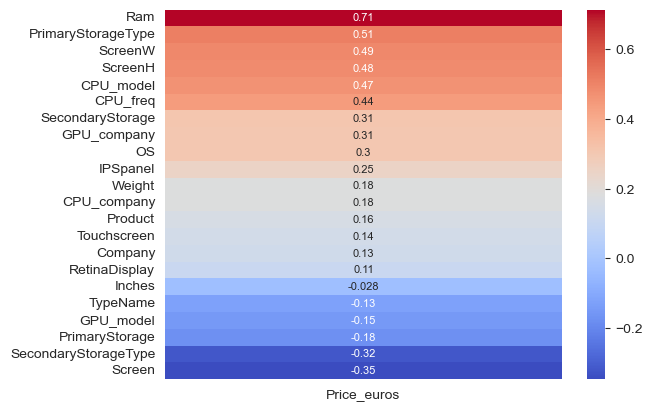

In [108]:

correlation_matrix = df1.corr()

mat=correlation_matrix[['Price_euros']].drop('Price_euros').sort_values(by='Price_euros', ascending=False) 

sns.heatmap(mat, annot_kws={"size": 8}, annot=True, cmap='coolwarm')


*scatterplot*

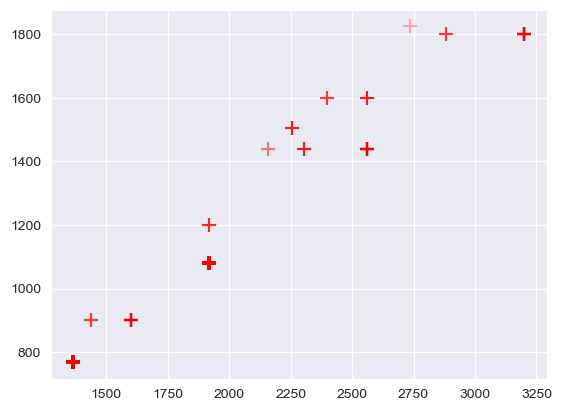

In [109]:
x,y=df1['ScreenW'],df1['ScreenH']
plt.scatter(x,y,c='red',marker= "+", s = 100, alpha=0.3)# c = '#000' , '#0f0'
plt.show()